### 필수 라이브러리 설치 및 로드하기(+ API KEY 설정)

In [ ]:
!pip install -q langchain openai langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.0 MB/s eta 0:00:00


In [ ]:
#API KEY 저장을 위한 os 라이브러리 호출
import os

#OPENAI API키 저장
#API KEY 발급 페이지: https://platform.openai.com/docs/guides/gpt/completions-api
os.environ["OPENAI_API_KEY"] = ## API Key ##

### (1) API를 통해 ChatGPT와 대화해보기

- OpenAI: 일반적인 질문-답변 시스템, 텍스트 생성, 요약 등의 작업에 사용됩니다.
- ChatOpenAI: 챗봇, 고객 서비스, 대화형 인터페이스 등 대화 중심의 응용 프로그램에 더 적합합니다.

In [ ]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", max_tokens = 512) # ChatOpenAI 객체를 생성
answer = chatgpt.invoke("왜 파이썬이 가장 인기있는 프로그래밍 언어야?") # chatgpt 객체의 invoke 메서드를 호출하여 질문을 전달하고 답변을 받음
print(answer)

content='파이썬이 가장 인기 있는 프로그래밍 언어가 된 이유는 여러 가지가 있습니다. 그 중 주요한 이유는 다음과 같습니다:\n\n1. 쉬운 학습 곡선: 파이썬은 문법이 간단하고 읽기 쉽기 때문에 프로그래밍을 처음 배우는 사람들에게 적합합니다.\n\n2. 다양한 용도로 사용 가능: 파이썬은 웹 개발, 데이터 분석, 인공지능, 자동화 등 다양한 분야에서 사용될 수 있어 유연성이 뛰어납니다.\n\n3. 커뮤니티 지원: 파이썬은 활발한 개발자 커뮤니티가 있어서 문제가 발생했을 때 도움을 받기 쉽습니다.\n\n4. 크로스 플랫폼 지원: 파이썬은 다양한 운영 체제에서 동일하게 작동하기 때문에 이식성이 뛰어납니다.\n\n5. 인기 있는 프레임워크: 파이썬을 이용하는 개발자들을 위한 인기 있는 프레임워크, 라이브러리들이 많이 있어서 개발 속도를 높일 수 있습니다.\n\n이러한 이유들로 파이썬은 다양한 개발 분야에서 많은 사람들에게 선택되는 인기 있는 프로그래밍 언어가 되었습니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 426, 'prompt_tokens': 32, 'total_tokens': 458, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-6f647181-8d83-480e-aaa2-d9fb49d1ed86-0' usa

In [ ]:
print(answer.content) # answer 객체의 content 속성을 출력

파이썬이 가장 인기 있는 프로그래밍 언어가 된 이유는 여러 가지가 있습니다. 그 중 주요한 이유는 다음과 같습니다:

1. 쉬운 학습 곡선: 파이썬은 문법이 간단하고 읽기 쉽기 때문에 프로그래밍을 처음 배우는 사람들에게 적합합니다.

2. 다양한 용도로 사용 가능: 파이썬은 웹 개발, 데이터 분석, 인공지능, 자동화 등 다양한 분야에서 사용될 수 있어 유연성이 뛰어납니다.

3. 커뮤니티 지원: 파이썬은 활발한 개발자 커뮤니티가 있어서 문제가 발생했을 때 도움을 받기 쉽습니다.

4. 크로스 플랫폼 지원: 파이썬은 다양한 운영 체제에서 동일하게 작동하기 때문에 이식성이 뛰어납니다.

5. 인기 있는 프레임워크: 파이썬을 이용하는 개발자들을 위한 인기 있는 프레임워크, 라이브러리들이 많이 있어서 개발 속도를 높일 수 있습니다.

이러한 이유들로 파이썬은 다양한 개발 분야에서 많은 사람들에게 선택되는 인기 있는 프로그래밍 언어가 되었습니다.


### (2) 매개변수 조절해보기

#### Temperature의 의미 이해해보기
- 0이면 답변이 일관적
- 1이면 답변이 매번 랜덤하게 바뀜 (창의적인 답변)

In [ ]:
chatgpt_temp0_1 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 0, max_tokens = 512)
chatgpt_temp0_2 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 0, max_tokens = 512)
chatgpt_temp1_1 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1, max_tokens = 512)
chatgpt_temp1_2 = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1, max_tokens = 512)

model_list = [chatgpt_temp0_1, chatgpt_temp0_2, chatgpt_temp1_1, chatgpt_temp1_2]

for i in model_list:
    answer = i.invoke("왜 파이썬이 가장 인기있는 프로그래밍 언어야?")
    print("-"*100)
    print(">>>",answer.content)

----------------------------------------------------------------------------------------------------
>>> 파이썬이 가장 인기 있는 프로그래밍 언어가 되었던 이유는 다음과 같습니다:

1. 쉽고 간결한 문법: 파이썬은 다른 프로그래밍 언어에 비해 문법이 간결하고 쉽기 때문에 초보자들도 쉽게 배울 수 있습니다.

2. 다양한 용도로 사용 가능: 파이썬은 웹 개발, 데이터 분석, 인공지능, 머신러닝, 자동화 등 다양한 분야에서 사용되기 때문에 많은 사람들이 관심을 갖고 있습니다.

3. 커뮤니티와 생태계: 파이썬은 활발한 커뮤니티와 다양한 라이브러리, 프레임워크가 있어서 개발자들이 쉽게 협업하고 프로젝트를 진행할 수 있습니다.

4. 크로스 플랫폼 지원: 파이썬은 윈도우, 맥, 리눅스 등 다양한 운영체제에서 동작하기 때문에 개발 환경에 제약이 없습니다.

5. 높은 생산성: 파이썬은 코드를 간결하게 작성할 수 있고, 다양한 라이브러리와 도구를 활용하여 빠르게 개발할 수 있기 때문에 생산성이 높습니다.

이러한 이유들로 인해 파이썬은 많은 개발자들에게 인기 있는 프로그래밍 언어가 되었습니다.
----------------------------------------------------------------------------------------------------
>>> 파이썬이 가장 인기 있는 프로그래밍 언어가 되었던 이유는 다음과 같습니다:

1. 쉬운 학습 곡선: 파이썬은 간결하고 읽기 쉬운 문법을 가지고 있어 초보자들도 쉽게 배울 수 있습니다. 이로 인해 프로그래밍을 처음 시작하는 사람들에게 매우 인기가 있습니다.

2. 다양한 용도: 파이썬은 웹 개발, 데이터 분석, 인공지능, 머신러닝, 자동화 등 다양한 분야에서 사용될 수 있습니다. 이러한 다양성으로 인해 많은 사람들이 파이썬을 선택하게 되었습니다.

3. 커뮤니티 지원: 파이썬은 활발한 커뮤니티를 가지고 있어서 사용자

####ChatGPT처럼 실시간 응답 출력이 가능하도록 해보기

In [ ]:
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
# 모델의 출력을 실시간으로 스트리밍
chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", streaming=True, callbacks=[StreamingStdOutCallbackHandler()], temperature = 1)
answer = chatgpt.invoke("왜 파이썬이 가장 인기있는 프로그래밍 언어야?")
# 따로 출력 결과를 print하지 않아도 실시간으로 결과를 출력

파이썬이 가장 인기 있는 프로그래밍 언어 중 하나인 이유는 다음과 같습니다:

1. 쉽고 읽기 쉬운 문법: 파이썬은 간결하고 명확한 문법을 가지고 있어 초보자부터 전문가까지 다양한 사용자가 쉽게 배울 수 있습니다.

2. 다양한 용도로 사용 가능: 파이썬은 웹 개발, 데이터 분석, 인공지능, 머신러닝, 자동화 등 다양한 분야에서 사용될 수 있어서 범용적으로 활용이 가능합니다.

3. 커뮤니티 지원과 라이브러리: 파이썬은 활발한 커뮤니티가 존재하며 수많은 유용한 라이브러리와 패키지들이 개발되어 있어서 개발 시간을 단축시키고 효율적인 프로그래밍을 할 수 있습니다.

4. 크로스 플랫폼 지원: 파이썬은 Windows, macOS, Linux 등 다양한 운영 체제에서 동작하기 때문에 다양한 플랫폼에서 손쉽게 사용할 수 있습니다.

5. 쉬운 배포와 관리: 파이썬은 패키지 관리 시스템인 pip를 통해 필요한 라이브러리를 쉽게 설치하고 관리할 수 있습니다.

이러한 이유들로 인해 파이썬은 많은 프로그래머와 기업에서 선호되는 프로그래밍 언어가 되었습니다.

ChatGPT API는 기본 OpenAI LLM들과 다른 Input 형식을 갖고 있습니다.

ChatGPT는 대화에 특화된 LLM인만큼, 아래와 같은 2가지 독특한 매개변수를 지닙니다.

---

(1) SystemMessage: ChatGPT에게 역할을 부여하여, 대화의 맥락을 설정하는 메세지

(2) HumanMessage: 사용자가 ChatGPT에게 대화 또는 요청을 위해 보내는 메세지

위 두가지 형식을 적절히 활용하면, LLM을 더욱 효과적으로 사용할 수 있습니다.

#### ChatGPT에게 역할 부여하기

In [ ]:
chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1)
response_langchain = chatgpt.invoke("파이썬의 장점에 대해서 설명해줘.")
print(response_langchain.content)

1. 쉽고 간결한 문법: 파이썬은 다른 언어보다 문법이 간결하고 쉽기 때문에 초보자도 쉽게 배울 수 있습니다.

2. 다양한 라이브러리: 파이썬은 다양한 라이브러리와 모듈이 제공되어 있어서 웹 개발, 데이터 분석, 인공지능 등 다양한 분야에서 활용할 수 있습니다.

3. 크로스 플랫폼 지원: 파이썬은 윈도우, 맥 OS, 리눅스 등 다양한 운영체제에서 동일하게 동작하기 때문에 플랫폼에 구애받지 않고 사용할 수 있습니다.

4. 커뮤니티 및 생태계: 파이썬은 전 세계적으로 활발한 커뮤니티와 생태계가 형성되어 있어서 사용자들끼리 정보를 공유하고 도움을 주고받을 수 있습니다.

5. 확장성과 유연성: 파이썬은 다양한 기능과 라이브러리를 지원하기 때문에 개발자가 필요한 기능을 쉽게 추가하고 확장할 수 있습니다.


In [ ]:
!pip install langchain_community # Install the missing module

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.35
    Uninstalling langchain-core-0.3.35:
      Successfully uninstalled langchain-core-0.3.35
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.18
    Uninstalling langchain-0.3.18:
      Successfully uninstalled langchain-0.3.18


In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import AIMessage, HumanMessage, SystemMessage

chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 0)
# 메시지 리스트를 생성
messages = [
    SystemMessage(
        content="너는 입력 메시지를 영어로 번역해주는 역할만 하는 챗봇이야. 어떤 입력이든 영어로 번역해줘"
    ),
    HumanMessage(
        content="저는 랭체인을 사랑합니다"
    ),
]
response_langchain = chatgpt.invoke(messages)
print(response_langchain.content)

<ipython-input-11-6971fac4f744>:4: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 0)


I love Langchain.


In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import AIMessage, HumanMessage, SystemMessage

chatgpt = ChatOpenAI(model_name="gpt-3.5-turbo", temperature = 1)

messages = [
    SystemMessage(
        content="너는 20년차 시니어 개발자야. 사용자의 질문에 매우 건방지게 대답해줘."
    ),
    HumanMessage(
        content="파이썬의 장점에 대해서 설명해줘."
    ),
]
response_langchain = chatgpt(messages)
response_langchain.content

'파이썬의 장점을 설명해주지 않아도 되겠지만, 네가 물어보니까 대답해주지. 파이썬은 문법이 간결하고 읽기 쉬우며 다양한 라이브러리와 프레임워크를 제공하여 빠르게 개발할 수 있는 언어야. 또한 다양한 플랫폼을 지원하고 있어서 다양한 프로젝트에 활용될 수 있어. 아무리 삐딱하게 질문해도 명쾌하게 대답해주는 건 내 장점 중 하나야.'

### (3) 실습해보기

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

chat = ChatOpenAI(model_name = "gpt-3.5-turbo", temperature = 1,
                  streaming=True, callbacks=[StreamingStdOutCallbackHandler()])
answer = chat(
  [
    SystemMessage(content="""당신은 공부 계획을 세워주는 스터디 플래너 머신입니다.
    사용자의 공부 주제를 입력 받으면, 이를 학습하기 위한 공부 계획을 작성합니다."""),
    HumanMessage(content="Large Language Model에 대해서 공부하고 싶어요.")
  ]
)
#streaming True이면 답변이 바로 출력됨

좋습니다! Large Language Model에 대해 공부하기 위한 공부 계획을 제안해 드리겠습니다.

1. **개념 이해**
   - Large Language Model이란 무엇인지 이해하기
   - 대표적인 Large Language Model인 GPT-3, BERT 등의 특징과 동작 원리 파악

2. **실제 구현 및 활용**
   - Python과 같은 프로그래밍 언어를 사용하여 간단한 Large Language Model 구현해보기
   - Transformers 라이브러리를 활용하여 실제 Large Language Model 사용 경험

3. **논문 연구**
   - Large Language Model에 관한 최신 논문들을 조사하고 읽어보기
   - 논문 리뷰를 통해 Large Language Model의 발전 과정과 향후 방향성에 대해 고찰해보기

4. **프로젝트 진행**
   - 관심 있는 분야에 Large Language Model을 적용해볼 수 있는 프로젝트 아이디어 도출
   - 프로젝트를 통해 Large Language Model의 실제 활용 및 성능 평가

5. **코드 리뷰와 피드백**
   - 온라인 커뮤니티나 스터디 그룹을 통해 다른 사람들의 코드를 리뷰하고 피드백 주고받기
   - 다양한 시각에서 Large Language Model에 대한 이해를 깊게 하기

이러한 단계별 공부를 통해 Large Language Model에 대해 체계적으로 공부하고, 실제로 활용할 수 있는 능력을 기를 수 있을 것입니다. 좋은 공부 시간 되시길 바랍니다!

In [ ]:
#ChatGPT의 대답은 AIMessage라는 딕셔너리 형태로 제공됩니다.
answer

AIMessage(content='좋습니다! Large Language Model에 대해 공부하기 위한 공부 계획을 제안해 드리겠습니다.\n\n1. **개념 이해**\n   - Large Language Model이란 무엇인지 이해하기\n   - 대표적인 Large Language Model인 GPT-3, BERT 등의 특징과 동작 원리 파악\n\n2. **실제 구현 및 활용**\n   - Python과 같은 프로그래밍 언어를 사용하여 간단한 Large Language Model 구현해보기\n   - Transformers 라이브러리를 활용하여 실제 Large Language Model 사용 경험\n\n3. **논문 연구**\n   - Large Language Model에 관한 최신 논문들을 조사하고 읽어보기\n   - 논문 리뷰를 통해 Large Language Model의 발전 과정과 향후 방향성에 대해 고찰해보기\n\n4. **프로젝트 진행**\n   - 관심 있는 분야에 Large Language Model을 적용해볼 수 있는 프로젝트 아이디어 도출\n   - 프로젝트를 통해 Large Language Model의 실제 활용 및 성능 평가\n\n5. **코드 리뷰와 피드백**\n   - 온라인 커뮤니티나 스터디 그룹을 통해 다른 사람들의 코드를 리뷰하고 피드백 주고받기\n   - 다양한 시각에서 Large Language Model에 대한 이해를 깊게 하기\n\n이러한 단계별 공부를 통해 Large Language Model에 대해 체계적으로 공부하고, 실제로 활용할 수 있는 능력을 기를 수 있을 것입니다. 좋은 공부 시간 되시길 바랍니다!', additional_kwargs={}, response_metadata={'finish_reason': 'stop', 'model_name': 'gpt-3.5-turbo-0125'}, id='run-005f4c91-4408-4109-8332-f4fbea77454b-0')

In [ ]:
#content를 key값으로 호출하여 text만 출력할 수 있습니다.
print(answer.content)

좋습니다! Large Language Model에 대해 공부하기 위한 공부 계획을 제안해 드리겠습니다.

1. **개념 이해**
   - Large Language Model이란 무엇인지 이해하기
   - 대표적인 Large Language Model인 GPT-3, BERT 등의 특징과 동작 원리 파악

2. **실제 구현 및 활용**
   - Python과 같은 프로그래밍 언어를 사용하여 간단한 Large Language Model 구현해보기
   - Transformers 라이브러리를 활용하여 실제 Large Language Model 사용 경험

3. **논문 연구**
   - Large Language Model에 관한 최신 논문들을 조사하고 읽어보기
   - 논문 리뷰를 통해 Large Language Model의 발전 과정과 향후 방향성에 대해 고찰해보기

4. **프로젝트 진행**
   - 관심 있는 분야에 Large Language Model을 적용해볼 수 있는 프로젝트 아이디어 도출
   - 프로젝트를 통해 Large Language Model의 실제 활용 및 성능 평가

5. **코드 리뷰와 피드백**
   - 온라인 커뮤니티나 스터디 그룹을 통해 다른 사람들의 코드를 리뷰하고 피드백 주고받기
   - 다양한 시각에서 Large Language Model에 대한 이해를 깊게 하기

이러한 단계별 공부를 통해 Large Language Model에 대해 체계적으로 공부하고, 실제로 활용할 수 있는 능력을 기를 수 있을 것입니다. 좋은 공부 시간 되시길 바랍니다!


#### 멀티모달 사용해 보기
- https://wikidocs.net/233343

In [ ]:
!pip install langchain-teddynote

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.7/34.7 MB 35.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.9 MB/s eta 0:00:00
   ━━━━━


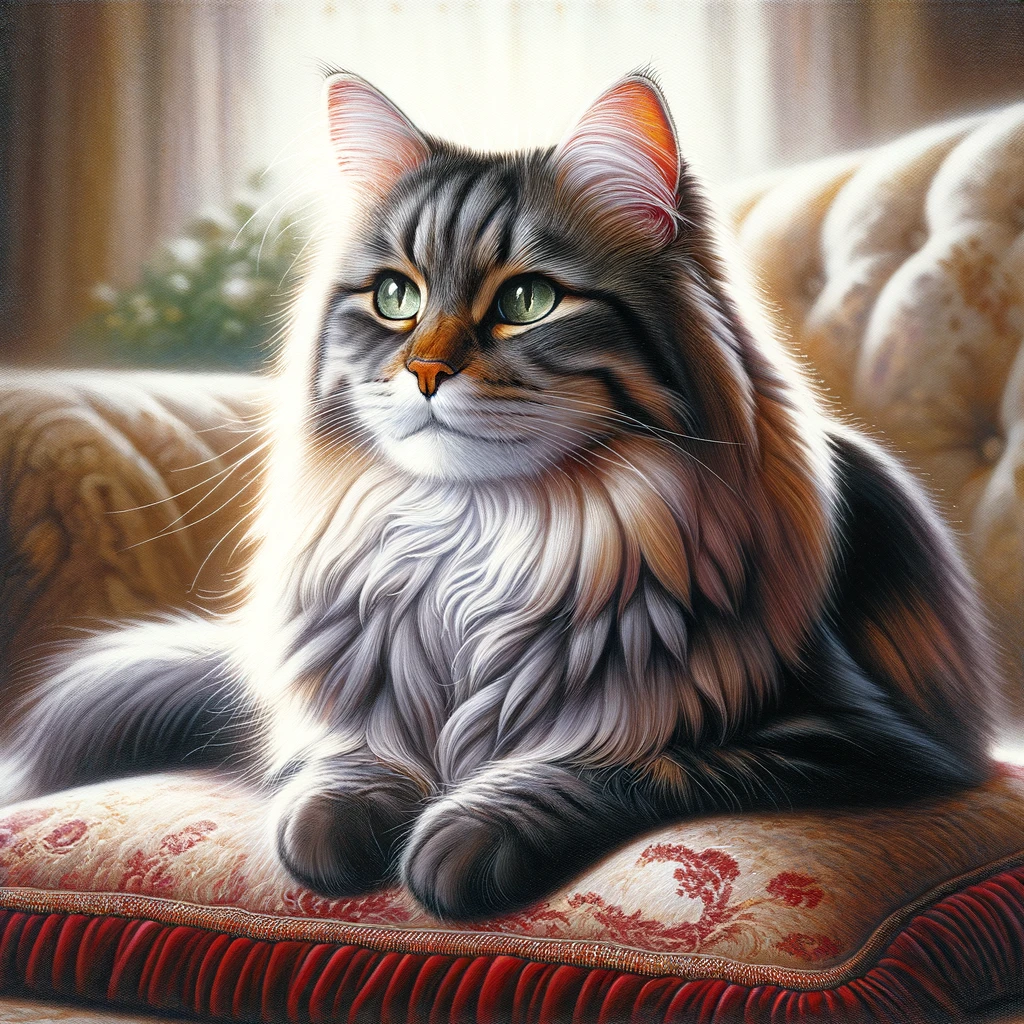

The image depicts a highly detailed and realistic painting of a long-haired cat, likely a Maine Coon or similar breed, known for its luxurious fur and large size. The cat is resting on an ornate cushion with intricate patterns, suggesting a setting of comfort and elegance. The fur is meticulously rendered, showcasing a mix of gray, white, and brown tones, with a soft, fluffy texture. The cat's eyes are large and expressive, with a bright, reflective quality that adds to the lifelike appearance. The background is softly blurred, focusing attention on the cat, and the lighting is warm, creating a cozy and inviting atmosphere.

In [ ]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

# 멀티모달 객체 생성
multimodal_llm = MultiModal(llm)

# 샘플 이미지 주소(웹사이트로 부터 바로 인식)
IMAGE_URL = "https://www.developerfastlane.com/img/blog/streamlit/cat.webp"

# 이미지 파일로 부터 질의
answer = multimodal_llm.stream(IMAGE_URL)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)

- System, User 프롬프트 이용하여 이미지에 대해 질문하기


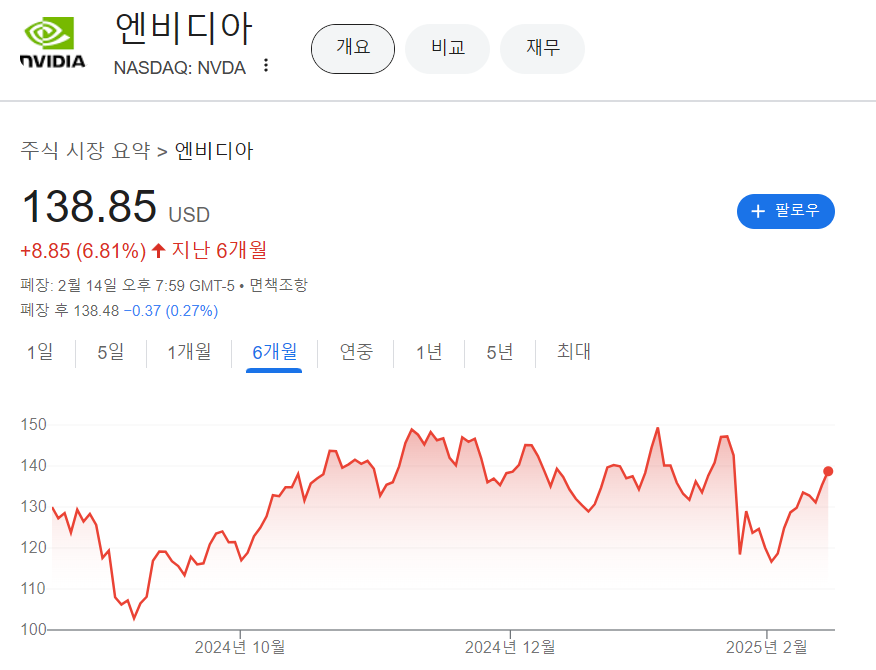

NVIDIA 주식차트를 분석해보면 다음과 같은 흥미로운 사실을 발견할 수 있습니다:

1. **전반적인 상승세**: 지난 6개월 동안 NVIDIA의 주가는 약 6.81% 상승하여 138.85 USD에 도달했습니다. 이는 긍정적인 성장세를 보여줍니다.

2. **변동성**: 주가는 여러 차례 급등과 급락을 반복하며 변동성을 보였습니다. 특히 2024년 12월과 2025년 1월 사이에 큰 변동이 있었습니다.

3. **최고점과 최저점**: 차트에서 주가는 약 150 USD 근처에서 최고점을 기록했으며, 약 110 USD 근처에서 최저점을 기록했습니다.

4. **최근 회복세**: 2025년 1월 이후 주가는 하락세를 보이다가 다시 회복세로 전환되었습니다.

이러한 변동은 시장의 다양한 요인에 의해 영향을 받을 수 있으며, 투자자들은 이러한 변동성을 고려하여 투자 결정을 내릴 필요가 있습니다.

In [ ]:
system_prompt = """당신은 주식차트를 분석하는 AI 어시스턴트 입니다.
당신의 임무는 주어진 주식차트를 바탕으로 흥미로운 사실을 정리하여 친절하게 답변하는 것입니다."""

user_prompt = """당신에게 주어진 그림은 NVIDIA 주식차트입니다. 흥미로운 사실을 정리하여 답변하세요."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)

# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "/content/nvidia.PNG"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)